In [18]:
import torch

def calculate_parents(alpha, edge_index, s):
    parents = torch.full((len(s),), -1, dtype=torch.long)
    for child in range(len(s)):
        indices = (edge_index[1] == child).nonzero(as_tuple=False).squeeze()
        passed_indices = indices[alpha[indices] == 1]
        if passed_indices.numel() > 0:
            parent_index = edge_index[0, passed_indices[0]]
            parents[child] = parent_index.item()
    return parents

In [ ]:
def calculate_parents(alpha, edge_index, s):
    parents = torch.full((len(s),), -1, dtype=torch.long)

    for child in range(len(s)):
        indices = (edge_index[1] == child).nonzero(as_tuple=False).squeeze()
        
        passed_indices = indices[alpha[indices] == 1]
        
        if passed_indices.numel() > 0:
            parent_index = edge_index[0, passed_indices[0]]
            parents[child] = parent_index.item()
    return parents

In [19]:
edge_index = torch.tensor([
    [0, 2, 1],
    [1, 1, 2]
])

In [20]:
alpha = torch.tensor([0.9, 0.1, 0.9])
s = torch.tensor([1, 0, 0])

In [21]:
calculate_parents(alpha, edge_index, s)

tensor([-1, -1, -1])

In [25]:
def get_parent_nodes(edge_index, alpha, s):
    parent_nodes = torch.zeros_like(s)

    for node in range(s.size(0)):
        # get 

In [27]:
get_parent_nodes(edge_index, alpha, s)

0
1
2


In [28]:
edge_index = torch.tensor([[0, 0, 1, 1, 1, 2, 3, 4],
                           [1, 2, 0, 3, 4, 0, 1, 1]])

In [ ]:
# plot this graph


In [29]:
pi = torch.tensor([0., 1., 1., 1., 0., 0., 0., 1.])

In [31]:
s = torch.tensor([0., 0., 0., 0., 1.])

In [37]:
def get_parent_nodes(edge_index, alpha, s, threshold=0.8):
    parent_nodes = torch.full_like(s, -1)  # Initialize with -1
    for node in range(s.size(0)):
        # get all edges that point to the current node
        incoming_edges = (edge_index[1] == node).nonzero(as_tuple=False).squeeze()
        # filter alpha based on threshold
        filtered_edges = incoming_edges[alpha[incoming_edges] >= threshold]
        # check if there are any edges after filtering
        if filtered_edges.numel() != 0:
            # get the index of the edge with the highest alpha after filtering
            max_alpha_index = torch.argmax(alpha[filtered_edges])
            # get the parent node
            parent_nodes[node] = edge_index[0, filtered_edges[max_alpha_index]].item()
    return parent_nodes

In [3]:
from generator import RandomGraphDataset

In [4]:
n=[5, 10]
p=0.3
dataset = RandomGraphDataset(root='./data/medium', gen_num_graph=10, n=n, p=p)

In [5]:
dataset[0].pi

tensor([1., 1., 0., 0., 1., 0.], dtype=torch.float64)

In [6]:
def get_parent_nodes(edge_index, alpha, s, threshold=0.8):
    parent_nodes = torch.full_like(s, -1)  # Initialize with -1
    for node in range(s.size(0)):
        # get all edges that point to the current node
        incoming_edges = (edge_index[1] == node).nonzero(as_tuple=False).squeeze()
        # filter alpha based on threshold
        filtered_edges = incoming_edges[alpha[incoming_edges] >= threshold]
        # check if there are any edges after filtering
        if filtered_edges.numel() != 0:
            # get the index of the edge with the highest alpha after filtering
            max_alpha_index = torch.argmax(alpha[filtered_edges])
            # get the parent node
            parent_nodes[node] = edge_index[0, filtered_edges[max_alpha_index]].item()
    return parent_nodes

In [7]:
import networkx as nx

tensor([[0, 0, 1, 2, 2, 3],
        [1, 2, 0, 0, 3, 2]])
tensor(0)
tensor([-1,  3,  0,  0])


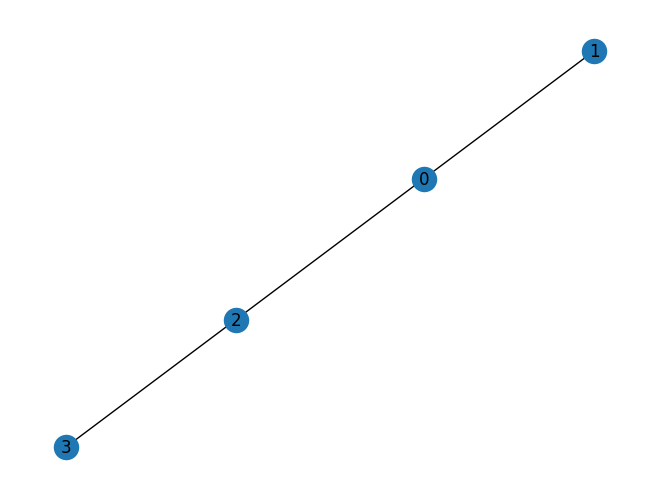

In [8]:
for i in range(dataset.len()):
    g = dataset[i]
    G = nx.Graph()
    G.add_edges_from(g.edge_index.T.numpy())
    nx.draw(G, with_labels=True)
    print(g.edge_index)
    print(g.s.argmax())
    print(g.parents)
    break

In [9]:
n=[5, 10]
p=0.3
dataset2 = RandomGraphDataset(root='./data/test2', gen_num_graph=10, n=n, p=p)

Generating 10 graphs


100%|██████████| 10/10 [00:00<00:00, 2127.04it/s]
Processing...
100%|██████████| 10/10 [00:00<00:00, 340.12it/s]
Done!


tensor([[0, 0, 3, 3, 1, 4],
        [2, 3, 1, 4, 6, 6]])
tensor(3)
tensor([ 3,  3,  0, -1,  3, -1,  1])


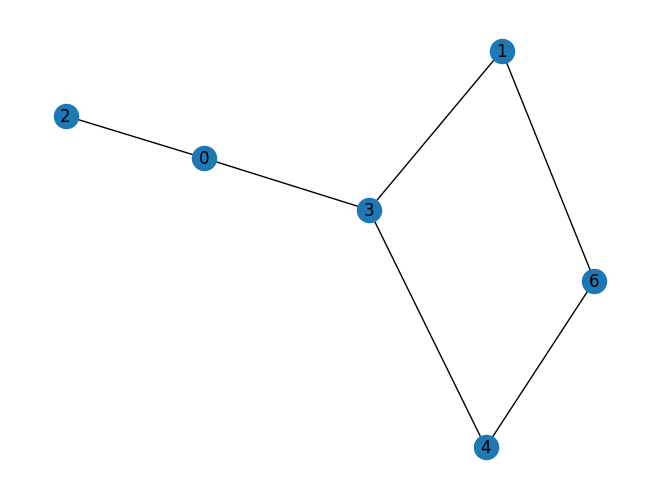

In [14]:
for i in range(dataset2.len()):
    g = dataset2[2]
    G = nx.Graph()
    G.add_edges_from(g.edge_index.T.numpy())
    nx.draw(G, with_labels=True)
    print(g.edge_index)
    print(g.s.argmax())
    print(g.parents)
    break

In [18]:
g.pi_h[-1]

tensor([1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [20]:
from clrs._src.algorithms.graphs import bfs

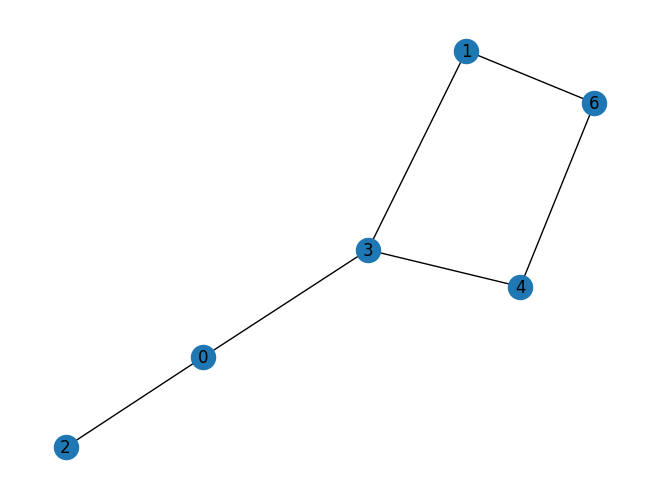

In [54]:
nx.draw(G, with_labels=True)

In [30]:
adj = nx.to_numpy_array(G)

In [48]:
g.s.argmax()

tensor(3)

In [49]:
b = bfs(adj, 3)

In [64]:
pi = b[1]['hint']['node']['pi_h']['data'][-1]

In [65]:
pi

array([2, 0, 3, 3, 2, 3])

In [68]:
def get_edges(A, pi: list, edge_index):
    """Returns a binary list of edges in the graph. If the edge was accessed by the algorithm, it is marked as 1, otherwise it is 0."""
    edges = np.zeros(len(edge_index[0]))
    for i in range(len(pi)):
        if pi[i] != -1:
            for j in range(len(edge_index[0])):
                if edge_index[1][j] == i and edge_index[0][j] == pi[i]:
                    edges[j] = 1
    return edges

In [63]:
get_edges(adj, pi)

array([0., 0., 0., 0., 0., 0.])